# <a id='toc1_'></a>[Beta Bank ¿Un cliente dejará el banco pronto?](#toc0_)

## <a id='toc1_1_'></a>[Descripción del proyecto](#toc0_)

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.  
Necesitamos predecir si un cliente dejará el banco pronto. Se tienen los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.  
Se crea un modelo con el máximo valor F1 posible. Se necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba.   
Además, se mide la métrica AUC-ROC y compararla con el valor F1.

**Table of contents**<a id='toc0_'></a>    
- [Beta Bank ¿Un cliente dejará el banco pronto?](#toc1_)    
  - [Descripción del proyecto](#toc1_1_)    
  - [Diccionario de datos](#toc1_2_)    
  - [Descargar y prepara los datos](#toc1_3_)    
    - [Importar librerias](#toc1_3_1_)    
    - [Carga de datos](#toc1_3_2_)    
    - [Estudiar los datos](#toc1_3_3_)    
    - [Limpieza de datos](#toc1_3_4_)    
      - [Añadir una nueva columna](#toc1_3_4_1_)    
      - [Eliminar columnas innecesarias](#toc1_3_4_2_)    
      - [Rellenar valores ausentes](#toc1_3_4_3_)    
      - [Transformación de los datos](#toc1_3_4_4_)    
      - [Formato al nombre de las columnas](#toc1_3_4_5_)    
    - [Dividir el dataframe en: train, valid y test](#toc1_3_5_)    
    - [Escalar los datos](#toc1_3_6_)    
  - [Entrenar el modelo sin considerar el equilibrio de clases](#toc1_4_)    
    - [Regresión logística](#toc1_4_1_)    
      - [Entrenamiento](#toc1_4_1_1_)    
      - [ROC-AUC](#toc1_4_1_2_)    
      - [Resultados](#toc1_4_1_3_)    
    - [Árbol de desición](#toc1_4_2_)    
      - [Entrenamiento](#toc1_4_2_1_)    
      - [ROC_AUC](#toc1_4_2_2_)    
      - [Resultados](#toc1_4_2_3_)    
    - [Bosque aleatorio de regresión](#toc1_4_3_)    
      - [Entrenamiento](#toc1_4_3_1_)    
      - [ROC_AUC](#toc1_4_3_2_)    
      - [Resultados](#toc1_4_3_3_)    
    - [Hallazgos](#toc1_4_4_)    
  - [Entrenar el modelo equilibrando las clases](#toc1_5_)    
    - [Sobremuestreo](#toc1_5_1_)    
    - [Regresión logística](#toc1_5_2_)    
      - [Entrenamiento](#toc1_5_2_1_)    
      - [ROC_AUC](#toc1_5_2_2_)    
      - [Resultados](#toc1_5_2_3_)    
    - [Árbol de desición](#toc1_5_3_)    
      - [Entrenamiento](#toc1_5_3_1_)    
      - [ROC_AUC](#toc1_5_3_2_)    
      - [Resultados](#toc1_5_3_3_)    
    - [Bosque aleatorio](#toc1_5_4_)    
      - [Entrenamiento](#toc1_5_4_1_)    
      - [ROC_AUC](#toc1_5_4_2_)    
      - [Resultados](#toc1_5_4_3_)    
    - [Ajuste de umbral](#toc1_5_5_)    
  - [Predicciones para el conjunto de prueba](#toc1_6_)    
    - [Comparación de resultados](#toc1_6_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Diccionario de datos](#toc0_)

Ubicación: `/datasets/Churn.csv`  
  
1. Características:
    - RowNumber: índice de cadena de datos
    - CustomerId: identificador de cliente único
    - Surname: apellido
    - CreditScore: valor de crédito
    - Geography: país de residencia
    - Gender: sexo
    - Age: edad
    - Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
    - Balance: saldo de la cuenta
    - NumOfProducts: número de productos bancarios utilizados por el cliente
    - HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
    - IsActiveMember: actividad del cliente (1 - sí; 0 - no)
    - EstimatedSalary: salario estimado
2. Objetivo
    - Exited: El cliente se ha ido (1 - sí; 0 - no)

## <a id='toc1_3_'></a>[Descargar y prepara los datos](#toc0_)

### <a id='toc1_3_1_'></a>[Importar librerias](#toc0_)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

### <a id='toc1_3_2_'></a>[Carga de datos](#toc0_)

In [3]:
# importar el dataframe con los datos de los clientes
df_churn = pd.read_csv('../datasets/Churn.csv')

### <a id='toc1_3_3_'></a>[Estudiar los datos](#toc0_)

In [4]:
# Ver la estructura de los datos
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Nota:**  
- Cambiar los nombres de las columnas al formato sneak_case
- Parece que rownumber, es un indice, puede ser eliminado
- Existen valores categoricos, hay que cambiarlos a un formato adecuado.
- Exited es el objetivo, sera un clasificación binaria.
- Geography tiene 3 valores, spain, france y germany.

In [5]:
# Ver si existen valores ausentes, cantidad de filas y tipos de datos
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Nota:**  
- Tenure contiene valores ausentes.
- Los datos numericos contienen tipos de datos adecuados. 

In [6]:
# Analizar las filas con valores ausentes en Ternure
df_churn[df_churn['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


**Nota:** No hay un patron claro, probablemente los clientes con valores usentes simplemente no apliquen a esta categoria, al no tener el plazo de maduración. Los valores se reemplazaran por 0.

In [7]:
# Porcentje de valores ausentes en la columna tenure
df_churn['Tenure'].isna().sum()*100/len(df_churn['Tenure'])

9.09

In [8]:
# Análisis descriptivo de los datos.
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Nota:**
- La edad va de 18 a 92. 
- Tenure va de 0 a 10.
- La mayoria de los clientes son activos y tienen tarjeta de credito.
- Menos del 25% de los clientes se han ido. 

### <a id='toc1_3_4_'></a>[Limpieza de datos](#toc0_)

#### <a id='toc1_3_4_1_'></a>[Añadir una nueva columna](#toc0_)

In [9]:
# Nueva columna que marque los valores ausentes con 1 y los no ausentes con 0
# Esto se hace para posteriormente poner los valores ausentes de la columna tenure como 0 y que tengan un identificador
# que los distinga de los valores con 0 real
# Como esta columna representa sus valores como años, creo que es posible decir que los usuario tienen 0 años sin el plazo
# y el identificador puede ayudar al modelo a entender que no son 0 reales
df_churn['is_tenure_nan'] = df_churn['Tenure'].isna().astype(int)
# Verificar los cambios
df_churn[df_churn['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_tenure_nan
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0,1
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0,1
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0,1
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0,1
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0,1


#### <a id='toc1_3_4_2_'></a>[Eliminar columnas innecesarias](#toc0_)

In [10]:
# Eliminar la columna row_number, que solo contiene el indice
# La columna sur_name que no aporta una relacion importante
# La columna coustomer_id que no aporta una relacion importante
df_churn = df_churn.drop(['RowNumber', 'Surname','CustomerId'], axis=1)
# Verificar los cambios
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_tenure_nan
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,0


#### <a id='toc1_3_4_3_'></a>[Rellenar valores ausentes](#toc0_)

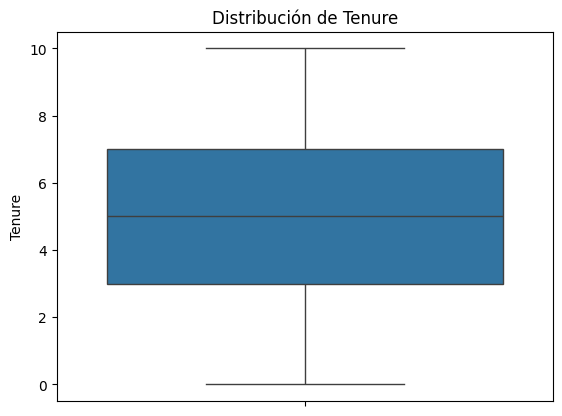

In [15]:
# Visualizar si existen valores atípicos
sns.boxplot(df_churn['Tenure'])
plt.title('Distribución de Tenure')
plt.show()

Debido a que no hay presencia de valores atípicos se utilizará la media para reemplazar los valores ausentes.

In [11]:
# Rellenar con el promedio los valores de la columna Tenure para cada variable categorica

# Seleccionar las columnas categoricas
var_categoricas = ['Geography', 'Gender']

# Agrupar por las columnas categoricas y rellenar con el promedio de la columna Tenure
df_churn['Tenure'].fillna(df_churn.groupby(var_categoricas)['Tenure'].transform("mean"), inplace=True)

# Verificar que no existan valores ausentes
df_churn.isna().sum()

C:\Users\euni-\AppData\Local\Temp\ipykernel_12280\1047492736.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_churn['Tenure'].fillna(df_churn.groupby(var_categoricas)['Tenure'].transform("mean"), inplace=True)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
is_tenure_nan      0
dtype: int64

#### <a id='toc1_3_4_4_'></a>[Transformación de los datos](#toc0_)

In [16]:
# Convertir los datos categóricos sin orden a númericos usando OHE
# columnas geography y gender
# Se dejara una sola columna que represente los datos con drop_first
df_churn_ohe = pd.get_dummies(df_churn, drop_first=True)
df_churn_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_tenure_nan,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.000000,0.00,1,1,1,101348.88,1,0,False,False,False
1,608,41,1.000000,83807.86,1,0,1,112542.58,0,0,False,True,False
2,502,42,8.000000,159660.80,3,1,0,113931.57,1,0,False,False,False
3,699,39,1.000000,0.00,2,0,0,93826.63,0,0,False,False,False
4,850,43,2.000000,125510.82,1,1,1,79084.10,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.000000,0.00,2,1,0,96270.64,0,0,False,False,True
9996,516,35,10.000000,57369.61,1,1,1,101699.77,0,0,False,False,True
9997,709,36,7.000000,0.00,1,0,1,42085.58,1,0,False,False,False
9998,772,42,3.000000,75075.31,2,1,0,92888.52,1,0,True,False,True


#### <a id='toc1_3_4_5_'></a>[Formato al nombre de las columnas](#toc0_)

In [17]:
# Nombres de las columnas en minusculas y snake_case
new_col_names = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
                 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited', 
                 'is_tenure_nan', 'geography_germany', 'geography_spain','gender_male']
df_churn_ohe.columns = new_col_names

# Verificar el cambio
df_churn_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,is_tenure_nan,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,False,True,False


### <a id='toc1_3_5_'></a>[Dividir el dataframe en: train, valid y test](#toc0_)

In [18]:
# Dividir el dataframe en caraterísticas y objetivo
target = df_churn_ohe['exited']
features = df_churn_ohe.drop('exited', axis=True)

In [19]:
# Separar el conjunto de datos en entrenamiento, validación y prueba final(proporción 3:1:1).
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.20, 
                                                                            random_state=12345)

### <a id='toc1_3_6_'></a>[Escalar los datos](#toc0_)

In [20]:
features_train.head(2)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,is_tenure_nan,geography_germany,geography_spain,gender_male
454,758,39,6.0,127357.76,1,0,1,56577.00,0,False,False,False
8307,618,30,3.0,133844.22,1,1,1,31406.93,0,False,False,True


In [21]:
# Selección de columnas númericas (no dummies) ni binarias (0 y 1)
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
# Selección de columnas categoricas
categoric_cols = ['geography_germany', 'geography_spain', 'gender_male', 'has_cr_card',
                  'is_active_member', 'is_tenure_nan']

In [22]:
# Crear una instancia de escalado para el conjunto train
scaler = StandardScaler()
# Escalar las características y objetivo de los datos de entrenamiento
features_numeric_train_scaled = scaler.fit_transform(features_train[numeric_cols])
# Crear el datafrme de las caracteristicas numercias escaladas
features_numeric_train_scaled = pd.DataFrame(features_numeric_train_scaled, 
                                                           columns=features_train[numeric_cols].columns)
# Combinar las columnas numericas y categoricas escaladas
features_train_scaled = pd.concat([features_train[categoric_cols].reset_index(),
                                  features_numeric_train_scaled.reset_index()], 
                                  axis=1)
# Eliminar la columna del index generado por la concatenación
features_train_scaled.drop('index',axis=True,inplace=True)
# Verificar los cambios
features_train_scaled

,geography_germany,geography_spain,gender_male,has_cr_card,is_active_member,is_tenure_nan,credit_score,age,tenure,balance,num_of_products,estimated_salary
0,False,False,False,0,1,0,1.107585,0.011482,0.358668,0.819420,-0.899779,-0.757878
1,False,False,True,1,1,0,-0.338704,-0.844298,-0.730314,0.923294,-0.899779,-1.194506
2,False,True,False,1,0,0,-0.782922,-1.224645,0.721663,-1.220083,0.811234,0.212357
3,False,False,True,1,1,1,-0.235398,-0.178692,0.015084,-1.220083,0.811234,1.239310
4,False,False,False,1,0,0,1.024940,-0.368865,-0.730314,-1.220083,-0.899779,1.583001
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,True,0,1,0,-1.051518,-0.749212,-0.367320,-1.220083,0.811234,-1.293767
7996,False,False,True,0,1,0,-1.423421,-0.939385,1.810645,-1.220083,0.811234,-1.296717
7997,False,False,False,0,1,1,0.043529,0.582002,-0.024926,-0.302049,-0.899779,-0.917957
7998,False,False,False,0,1,0,0.167497,-1.414818,-0.367320,-1.220083,0.811234,-1.143702


In [43]:
# Escalar las características y objetivo de los datos de prueba
features_numeric_test_scaled = scaler.transform(features_test[numeric_cols])
# Crear el datafrme de las caracteristicas numercias escaladas
features_numeric_test_scaled = pd.DataFrame(features_numeric_test_scaled, 
                                            columns=features_test[numeric_cols].columns)
# Combinar las columnas numericas y categoricas escaladas
features_test_scaled = pd.concat([features_test[categoric_cols].reset_index(),
                                  features_numeric_test_scaled.reset_index()], 
                                  axis=1)
# Eliminar la columna del index generado por la concatenación
features_test_scaled.drop('index',axis=True,inplace=True)
# Verificar el dataframe
features_test_scaled

,geography_germany,geography_spain,gender_male,has_cr_card,is_active_member,is_tenure_nan,credit_score,age,tenure,balance,num_of_products,estimated_salary
0,False,True,False,1,1,0,-0.111430,0.677088,-0.730314,-1.220083,-0.899779,0.971335
1,False,False,True,1,0,0,1.097255,-0.939385,1.084657,0.866641,-0.899779,-0.395456
2,False,True,True,1,1,0,1.613787,0.296742,-0.004326,-1.220083,0.811234,-0.440011
3,False,True,True,1,1,0,0.177828,0.582002,-0.367320,0.421128,0.811234,1.008096
4,False,False,True,1,1,0,0.498078,-1.034472,0.721663,-1.220083,0.811234,-1.345810
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,1,1,0,1.985690,-1.129558,-0.004326,-1.220083,0.811234,-0.568495
1996,False,False,False,1,1,0,-1.061849,-0.368865,1.810645,-1.220083,-0.899779,-1.196365
1997,False,True,True,1,1,0,-0.008124,3.054255,-1.819297,-1.220083,-0.899779,1.303023
1998,True,False,True,1,1,0,0.766674,0.011482,-1.456303,-0.405276,0.811234,1.452950


## <a id='toc1_4_'></a>[Entrenar el modelo sin considerar el equilibrio de clases](#toc0_)

### <a id='toc1_4_1_'></a>[Regresión logística](#toc0_)

#### <a id='toc1_4_1_1_'></a>[Entrenamiento](#toc0_)

In [23]:
# Inicializar la instncia del modelo de regresión logísticas
model_rl = LogisticRegression(random_state=12345, solver='liblinear')

# Hiperparámetros a probar
param_grid_rl = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2']  
}

# Configurar GridSearchCV para la regresión logística
grid_search_rl = GridSearchCV(estimator=model_rl, param_grid=param_grid_rl, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_rl.fit(features_train_scaled, target_train)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_rl_ub = grid_search_rl.best_params_
best_f1_rl_ub = grid_search_rl.best_score_ 
best_model_rl_ub = grid_search_rl.best_estimator_

print("Mejores hiperparámetros:", best_params_rl_ub)
print("Mejor F1:", best_f1_rl_ub)

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2'}
Mejor F1: 0.32016421715507026


#### <a id='toc1_4_1_2_'></a>[ROC-AUC](#toc0_)

In [24]:
# Obtener los resultados de la validación cruzada
results_rl = grid_search_rl.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_rl = np.argmax(results_rl['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_rl = results_rl['mean_test_roc_auc'][best_index_rl]
best_roc_auc_rl

0.76549198573081

#### <a id='toc1_4_1_3_'></a>[Resultados](#toc0_)
  
**Mejores hiperparámetros:** {'C': 1, 'penalty': 'l2'}  
**Mejor F1:** 0.3201642171550703  
**ROC_AUC:** 0.76549198573081

### <a id='toc1_4_2_'></a>[Árbol de desición](#toc0_)

#### <a id='toc1_4_2_1_'></a>[Entrenamiento](#toc0_)

In [25]:
# Inicializar la instancia del modelo de árbol de desición
model_dt = DecisionTreeClassifier(random_state=12345)

# Hiperparámetros a probar
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Configurar GridSearchCV para el árbol de desición
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_dt.fit(features_train_scaled, target_train)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_dt_ub = grid_search_dt.best_params_
best_score_dt_ub = grid_search_dt.best_score_ 
best_model_dt_ub = grid_search_dt.best_estimator_

print("Mejores hiperparámetros:", best_params_dt_ub)
print("Mejor F1:", best_score_dt_ub)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor F1: 0.5556617498967295


#### <a id='toc1_4_2_2_'></a>[ROC_AUC](#toc0_)

In [26]:
# Obtener los resultados de la validación cruzada
results_dt = grid_search_dt.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_dt = np.argmax(results_dt['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_dt = results_dt['mean_test_roc_auc'][best_index_dt]
best_roc_auc_dt

0.7945008213532401

#### <a id='toc1_4_2_3_'></a>[Resultados](#toc0_)

**Mejores hiperparámetros:** {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}  
**Mejor F1:** 0.5556617498967295  
**ROC_AUC:** 0.7945008213532401
  
El modelo tiene un mejor rendimiento que el de regresión logística tanto en f1 como en roc_auc. Casi llega al objetivo del proyecto que es f1 al 0.59.

### <a id='toc1_4_3_'></a>[Bosque aleatorio de regresión](#toc0_)

#### <a id='toc1_4_3_1_'></a>[Entrenamiento](#toc0_)

In [27]:
# Definir el modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=12345)

# Definir los hiperparámetros
param_grid_rf = {
    'n_estimators': [20, 50, 75],
    'max_depth': [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_rf.fit(features_train_scaled, target_train)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_rf_ub = grid_search_rf.best_params_
best_score_rf_ub = grid_search_rf.best_score_ 
best_model_rf_ub = grid_search_rf.best_estimator_

print("Mejores hiperparámetros:", best_params_rf_ub)
print("Mejor F1:", best_score_rf_ub)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 20}
Mejor F1: 0.5822964778257065


#### <a id='toc1_4_3_2_'></a>[ROC_AUC](#toc0_)

In [28]:
# Obtener los resultados de la validación cruzada
results_rf = grid_search_rf.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_rf = np.argmax(results_rf['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_rf = results_rf['mean_test_roc_auc'][best_index_rf]
best_roc_auc_rf

0.8481230377433684

#### <a id='toc1_4_3_3_'></a>[Resultados](#toc0_)
**Mejores hiperparámetros:** {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 75}  
**Mejor F1:** 0.57938170916313  
**AUC_ROC:** 0.8504590343996344
  
Mejora el resultado de f1 y auc_roc en comparción del árbol de desición.

### <a id='toc1_4_4_'></a>[Hallazgos](#toc0_)

In [29]:
# Total de valores objetivo 
target.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

- Clase desbalanceda hacia, un 75% de los datos totales tienen como objetivo un "1". El análisis se vera afectado por el desiquilibrio de clases, causando un sesgo hacia la clase dominante (1).
- AUC-ROC: 0.8504. Indica un rendimiento sólido, donde el modelo es capaz de clasificar las observaciones positivas y negativas de manera efectiva.
- F1: 0.5793. El modelo tiene un equilibrio razonable entre precisión y recall en la clasificación de las clases, sin embargo esta sesgado hacia la clase con valores positivos. No se llego al 0.59 que propone el proyecto.

## <a id='toc1_5_'></a>[Entrenar el modelo equilibrando las clases](#toc0_)

  
Se aplicaran 3 enfoques:
- Ajuste de peso de clase, la función del modelo, incluye un parámetro llamada class_weight. Se pondra en 'balanced'.
- Sobremuestreo a la clase con valores de 0.
- Umbral de clasificación.

### <a id='toc1_5_1_'></a>[Sobremuestreo](#toc0_)

In [30]:
# Función para crear un sobremuestreo para la clase de 0 
def upsample(features, target, repeat):
    # Filtrar por valores de 0 o de 1 para las características y objetivos
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Sobremuesrear los valores de 0 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # Mezclar los datos para evitar patrones 
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    
    return features_upsampled, target_upsampled

In [31]:
# Resetear los indices de la serie con el objetivo
target_train.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

In [32]:
# Aplicar la función de sobremuestreo en los conjuntos de entrenamiento para la clase 0
features_train_upsampled, target_train_upsampled = upsample(
    features_train_scaled, target_train, 4
)
target_train_upsampled.value_counts()

exited
1    6440
0    6390
Name: count, dtype: int64

### <a id='toc1_5_2_'></a>[Regresión logística](#toc0_)

#### <a id='toc1_5_2_1_'></a>[Entrenamiento](#toc0_)

In [33]:
# Inicializar la instncia del modelo de regresión logísticas
model_rl = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

# Hiperparámetros a probar
param_grid_rl = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2']  
}

# Configurar GridSearchCV para la regresión logística
grid_search_rl = GridSearchCV(estimator=model_rl, param_grid=param_grid_rl, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_rl.fit(features_train_upsampled, target_train_upsampled)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_rl = grid_search_rl.best_params_
best_f1_rl = grid_search_rl.best_score_ 
best_model_rl = grid_search_rl.best_estimator_

print("Mejores hiperparámetros:", best_params_rl)
print("Mejor F1:", best_f1_rl)

Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l1'}
Mejor F1: 0.7021386191706342


#### <a id='toc1_5_2_2_'></a>[ROC_AUC](#toc0_)

In [34]:
# Obtener los resultados de la validación cruzada
results_rl = grid_search_rl.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_rl = np.argmax(results_rl['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_rl = results_rl['mean_test_roc_auc'][best_index_rl]
best_roc_auc_rl

0.728896932318549

#### <a id='toc1_5_2_3_'></a>[Resultados](#toc0_)

**Mejores hiperparámetros:** {'C': 0.001, 'penalty': 'l1'}  
**Mejor F1:** 0.7021386191706342  
**ROC_AUC:** 0.728896932318549

El balanceo de clases aporto una enorme mejoria en el valor objetivo F1. Ya sobrepasa el valor propuesto de 0.59.

### <a id='toc1_5_3_'></a>[Árbol de desición](#toc0_)

#### <a id='toc1_5_3_1_'></a>[Entrenamiento](#toc0_)

In [35]:
# Inicializar la instancia del modelo de árbol de desición
model_dt = DecisionTreeClassifier(random_state=12345)

# Hiperparámetros a probar
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Configurar GridSearchCV para el árbol de desición
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_dt.fit(features_train_upsampled, target_train_upsampled)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_ 
best_model_dt = grid_search_dt.best_estimator_

print("Mejores hiperparámetros:", best_params_dt)
print("Mejor F1:", best_score_dt)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1: 0.9298403225149607


#### <a id='toc1_5_3_2_'></a>[ROC_AUC](#toc0_)

In [36]:
# Obtener los resultados de la validación cruzada
results_dt = grid_search_dt.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_dt = np.argmax(results_dt['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_dt = results_dt['mean_test_roc_auc'][best_index_dt]
best_roc_auc_dt

0.9241905539517298

#### <a id='toc1_5_3_3_'></a>[Resultados](#toc0_)

**Mejores hiperparámetros:** {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}  
**Mejor F1:** 0.9298517434804536  
**ROC_AUC:** 0.9241905539517298

Mejor dempeño que el entrenamiento sin balanceo. Puntuación casi perfecta. Supera al modelo de regresión con balanceo.

### <a id='toc1_5_4_'></a>[Bosque aleatorio](#toc0_)

#### <a id='toc1_5_4_1_'></a>[Entrenamiento](#toc0_)

In [37]:
# Definir el modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=12345, class_weight='balanced', criterion='entropy', max_features='sqrt')

# Definir los hiperparámetros
param_grid_rf = {
    'n_estimators': [20, 50, 75],
    'max_depth': [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring=['f1','roc_auc'], refit='f1', n_jobs=-1)

# Entrenar el modelo con búsqueda de cuadrícula
grid_search_rf.fit(features_train_upsampled, target_train_upsampled)

# Obtener los mejores hiperparámetros y puntaje de f1
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_ 
best_model = grid_search_rf.best_estimator_

print("Mejores hiperparámetros:", best_params_rf)
print("Mejor F1:", best_score_rf)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Mejor F1: 0.959070111663346


#### <a id='toc1_5_4_2_'></a>[ROC_AUC](#toc0_)

In [38]:
# Obtener los resultados de la validación cruzada
results_rf = grid_search_rf.cv_results_

# Encontrar el índice del modelo con la mejor puntuación F1
best_index_rf = np.argmax(results_rf['mean_test_f1'])

# Obtener el ROC AUC correspondiente al modelo con la mejor puntuación F1
best_roc_auc_rf = results_rf['mean_test_roc_auc'][best_index_rf]
best_roc_auc_rf

0.9955491402521408

#### <a id='toc1_5_4_3_'></a>[Resultados](#toc0_)

**Mejores hiperparámetros:** {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  
**Mejor F1:** 0.9599624472531618  
**ROC_AUC:** 0.9968898536144403
  
Resultados casi perfectos para el conjunto de entrenamiento. Supera al modelo de árbol de desición. Se tomara este modelo por tener mejores puntuaciónes.

### <a id='toc1_5_5_'></a>[Ajuste de umbral](#toc0_)

In [39]:
# Obtener las probabilidades para la clase positiva del conjunto de validación
probabilities_valid = best_model.predict_proba(features_train_upsampled)
probabilities_one_valid = probabilities_valid[:, 1]

In [40]:
# Obtener el mejor umbral desde 0 a 0.6 con intevalos de 0.02
# Para encontrar un F1 mayor a 0.59
for threshold in np.arange(0.3, 0.6, 0.01):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_train_upsampled, predicted_valid) 
    auc_roc = roc_auc_score(target_train_upsampled, predicted_valid)

    print(
        'Threshold = {:.4f} | f1 = {:.4f}, auc-roc = {:.4f}'.format(
            threshold, f1, auc_roc
        )
    )

Threshold = 0.3000 | f1 = 0.9928, auc-roc = 0.9927
Threshold = 0.3100 | f1 = 0.9928, auc-roc = 0.9927
Threshold = 0.3200 | f1 = 0.9928, auc-roc = 0.9927
Threshold = 0.3300 | f1 = 0.9928, auc-roc = 0.9927
Threshold = 0.3400 | f1 = 0.9928, auc-roc = 0.9927
Threshold = 0.3500 | f1 = 0.9966, auc-roc = 0.9966


Threshold = 0.3600 | f1 = 0.9966, auc-roc = 0.9966
Threshold = 0.3700 | f1 = 0.9966, auc-roc = 0.9966
Threshold = 0.3800 | f1 = 0.9966, auc-roc = 0.9966
Threshold = 0.3900 | f1 = 0.9966, auc-roc = 0.9966
Threshold = 0.4000 | f1 = 0.9987, auc-roc = 0.9987
Threshold = 0.4100 | f1 = 0.9987, auc-roc = 0.9987
Threshold = 0.4200 | f1 = 0.9987, auc-roc = 0.9987
Threshold = 0.4300 | f1 = 0.9987, auc-roc = 0.9987
Threshold = 0.4400 | f1 = 0.9987, auc-roc = 0.9987
Threshold = 0.4500 | f1 = 0.9997, auc-roc = 0.9997
Threshold = 0.4600 | f1 = 0.9997, auc-roc = 0.9997
Threshold = 0.4700 | f1 = 0.9997, auc-roc = 0.9997
Threshold = 0.4800 | f1 = 0.9997, auc-roc = 0.9997
Threshold = 0.4900 | f1 = 0.9997, auc-roc = 0.9997
Threshold = 0.5000 | f1 = 1.0000, auc-roc = 1.0000
Threshold = 0.5100 | f1 = 1.0000, auc-roc = 1.0000
Threshold = 0.5200 | f1 = 1.0000, auc-roc = 1.0000
Threshold = 0.5300 | f1 = 1.0000, auc-roc = 1.0000
Threshold = 0.5400 | f1 = 1.0000, auc-roc = 1.0000
Threshold = 0.5500 | f1 = 1.000

**Nota:** Se tomara un umbral del `0.48` porque es donde mejor resultado para `F1 = 1.0` (El objetivo del proyecto)

## <a id='toc1_6_'></a>[Predicciones para el conjunto de prueba](#toc0_)

### <a id='toc1_6_1_'></a>[Comparación de resultados](#toc0_)

Todos los modelos muestras una mejoria tras el ajuste de peso y balanceo de clases para las metricas F1 y ROC-AUC.  
Se selecciono el modelo que obtuvo la mejor puntuación F1, el cual corresponde al bosque aleatorio con ajuste de peso, balanceo y ajuste de umbral. 

| Modelo             | Ajuste de peso | Balanceo    | Umbral    | F1       | ROC-AUC  |
|--------------------|----------------|-------------|-----------|----------|----------|
| Regresión Logística|       No       |     No      | 0.50      |  0.3201  |  0.7945  |
| Regresión Logística|    balanced    | upsampled   | 0.50      |  0.9298  |  0.9241  |
| Árbol de desición  |       No       |     No      | 0.50      |  0.5557  |  0.7945  |
| Árbol de desición  |    balanced    | upsampled   | 0.50      |  0.9298  |  0.9242  |
| Bosque aleatorio   |       No       |     No      | 0.50      |  0.5794  |  0.8504  |
|**Bosque aleatorio**|  **balanced**  |**upsampled**| **0.44**  |**0.9600**|**0.9969**|

In [53]:
# Obtener las probabilidades para la clase positiva
probabilities_test = best_model.predict_proba(features_test_scaled)
probabilities_one_test = probabilities_test[:, 1]

# Ajuste de umbral
predictions_one_valid_t = probabilities_one_test > .44

# Predicciones del conjunto de validación para F1
f1 = f1_score(target_test, predictions_one_valid_t)
f1

0.6066897347174164

El valor de `F1` para el conjunto de prueba fue de `0.6066`.

- El umbral permite mejorar las predicciones basadas en una metrica.
- La diferencia entre los modelos sin balancear y balanceados son considerablemente altas. Para el conjunto de entrenamiento sin balancear el valor de F1 fue 0.57, mientras que para el conjunto de prueba balanceado fue de 0.96.
- Se supero la métrica de F1 para el conjunto de prueba propuesto de 0.58. El resultado fue `f1=0.6066`